# Train a JointVAE model

### Get MNIST data
Build a simple JointVAE model on MNIST

In [1]:
from utils.dataloaders import get_mnist_dataloaders
train_loader, test_loader = get_mnist_dataloaders(batch_size=64)

100.0%
100.0%
100.0%
100.0%


### Define latent distribution of the model

In [4]:
# Latent distribution will be joint distribution of 10 gaussian normal distributions
# and one 10 dimensional Gumbel Softmax distribution
latent_spec = {'cont': 3,
               'disc': [10]}

### Build a model

In [5]:
from jointvae.models import VAE

model = VAE(latent_spec=latent_spec, img_size=(1, 32, 32))

In [6]:
print(model)

VAE(
  (img_to_features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
  )
  (features_to_hidden): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc_mean): Linear(in_features=256, out_features=3, bias=True)
  (fc_log_var): Linear(in_features=256, out_features=3, bias=True)
  (fc_alphas): ModuleList(
    (0): Linear(in_features=256, out_features=10, bias=True)
  )
  (latent_to_features): Sequential(
    (0): Linear(in_features=13, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1024, bias=True)
    (3): ReLU()
  )
  (features_to_img): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): ConvTr

### Train the model

In [7]:
from torch import optim

# Build optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-4)

In [8]:
from jointvae.training import Trainer

# Define the capacities
# Continuous channels
cont_capacity = [0.0, 5.0, 25000, 30.0]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0
# Discrete channels
disc_capacity = [0.0, 5.0, 25000, 30.0]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0

# Build a trainer
trainer = Trainer(model, optimizer,
                  cont_capacity=cont_capacity,
                  disc_capacity=disc_capacity)

In [11]:
# Build a visualizer which will be passed to trainer to visualize progress during training
from viz.visualize import Visualizer

viz = Visualizer(model)

In [13]:
# Train model for 10 epochs
# Note this should really be a 100 epochs and trained on a GPU, but this is just to demo

trainer.train(train_loader, epochs=2)

0/60000	Loss: 220.840
3200/60000	Loss: 238.563
6400/60000	Loss: 236.858
9600/60000	Loss: 240.207
12800/60000	Loss: 238.222
16000/60000	Loss: 235.244
19200/60000	Loss: 234.609
22400/60000	Loss: 234.427
25600/60000	Loss: 233.069
28800/60000	Loss: 232.030
32000/60000	Loss: 231.639
35200/60000	Loss: 231.954
38400/60000	Loss: 229.011
41600/60000	Loss: 233.104
44800/60000	Loss: 231.382
48000/60000	Loss: 230.598
51200/60000	Loss: 227.981
54400/60000	Loss: 231.012
57600/60000	Loss: 229.213
Epoch: 1 Average loss: 233.26
0/60000	Loss: 235.829
3200/60000	Loss: 229.794
6400/60000	Loss: 227.567
9600/60000	Loss: 228.045
12800/60000	Loss: 228.126
16000/60000	Loss: 226.987
19200/60000	Loss: 227.817
22400/60000	Loss: 225.643
25600/60000	Loss: 227.026
28800/60000	Loss: 225.381
32000/60000	Loss: 223.450
35200/60000	Loss: 222.043
38400/60000	Loss: 223.896
41600/60000	Loss: 221.371
44800/60000	Loss: 222.493
48000/60000	Loss: 223.799
51200/60000	Loss: 221.113
54400/60000	Loss: 222.413
57600/60000	Loss: 219.

### Visualize

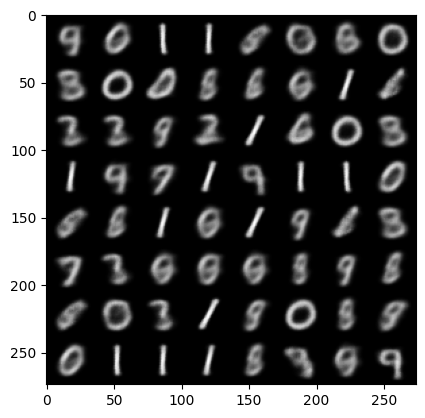

In [15]:
# Plot samples
samples = viz.samples()
plt.imshow(samples.numpy()[0, :, :], cmap='gray')

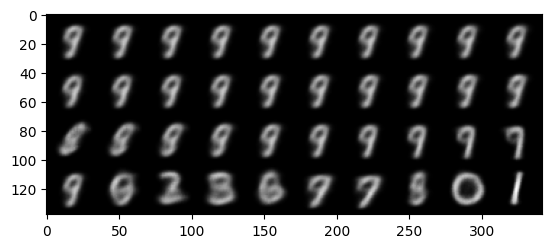

In [16]:
# Plot all traversals
traversals = viz.all_latent_traversals(size=10)
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')